In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fftpack import dct
from sklearn.decomposition import PCA

In [91]:
df = pd.read_csv('train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mat = df.iloc[:, 1:].to_numpy()

In [35]:
dct_mat = dct(mat).reshape(100, 28, 28)

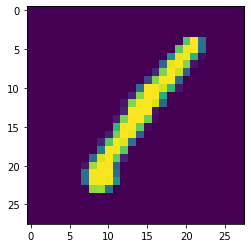

In [29]:
plt.imshow(mat[0].reshape(28,28))

In [30]:
test = mat[0]

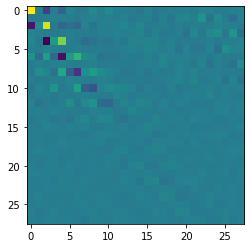

In [31]:
plt.imshow(dct(test).reshape(28,28))

In [94]:
len(df)

42000

In [95]:
df = pd.read_csv('train.csv')

    # label array x1
labels = df.iloc[:, 1].to_numpy()

    # images matrix 42000x784
images = df.iloc[:, 1:].to_numpy()

    # reshaped dct mat 42000x28x28
img_dct = dct(images).reshape(42000, 28, 28)

    # extract vertical, horizontal, diagonal
vert = img_dct[:, :, 0]
hori = img_dct[:, 0, :]
diag = [img_dct[i].diagonal() for i in range(42000)]

In [42]:
len(vert)

100

In [48]:
img_dct[:, :, 0]

array([[ 3.32980000e+04, -6.20586960e+02, -2.16035322e+04, ...,
        -1.11776517e+02,  6.51281921e+02, -3.35220886e+01],
       [ 8.92180000e+04, -2.67436865e+02, -3.98732489e+04, ...,
        -3.07110841e+02,  9.36662099e+02,  1.21189623e+03],
       [ 2.68500000e+04, -1.55156623e+01, -2.62991846e+04, ...,
         1.16877178e+02,  3.83992779e+02, -1.28514795e+02],
       ...,
       [ 7.35820000e+04, -4.17056508e+02, -3.81421584e+04, ...,
        -2.53262991e+02, -1.10437203e+03, -7.93148655e+02],
       [ 6.53140000e+04,  8.70941424e+01, -2.37322856e+04, ...,
        -1.92707254e+02, -8.17007960e+02,  3.53113621e+02],
       [ 8.89580000e+04, -4.26230590e+02, -5.01036220e+04, ...,
         5.14786436e+02,  5.36414278e+01, -3.76958998e+02]])

In [96]:
vert_df = pd.DataFrame(vert)
hori_df = pd.DataFrame(hori)
diag_df = pd.DataFrame(diag)

coef_set = pd.concat([vert_df, hori_df, diag_df], axis=1)

In [97]:
pca = PCA(n_components=10)

In [98]:
pca.fit(coef_set)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [99]:
principalComponents = pca.transform(coef_set)

In [100]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10',])

finalDf = pd.concat([principalDf, df.label], axis = 1)

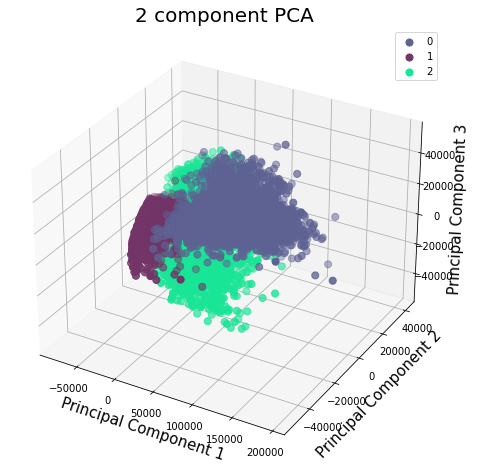

In [111]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = [0, 1, 2]
for label in labels:
    indicesToKeep = finalDf.label == label
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2'], finalDf.loc[indicesToKeep, 'PC3']
               , color = np.random.rand(3,)
               , s = 50)
ax.legend(labels)
ax.grid()

In [76]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
pca.explained_variance_ratio_

array([0.542961, 0.077854])